# Class 1: Revising Python basics

&nbsp;  
**Welcome to class 1!** Today, we'll be performing a simple experiment and analysing the results. This notebook will help you revise some of the basics of Python, particularly pandas and seaborn.

## Load the modules

First, let's import some useful Python modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

## Collect your data

<div>
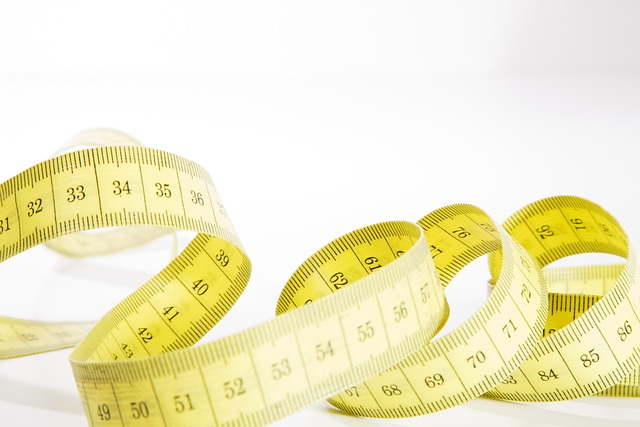
</div>
&nbsp;  

Much has been made of a link between brain size and intelligence. We will test this by correlating head circumference with the marks from the warm-up quiz.

Before you start, make a note of your **hypothesis** in the cell below.

> Write your hypothesis here.

Each group of five should have a tape measure. Choose two people in your group to be the 'measurers'. The measurers should each measure the head circumference of everyone in the group and everyone in the group beside you. When you take your measurements, wrap the tape measure around just above the ears. 

You should all have your head measured four times - twice by the measurers in your group and twice by the measurers from the group beside you.

## Enter the data into Python

Now it is time to enter your data into Python. To do this, we will make a **dataframe** by combining five lists (group member, and then the four sets of measurements). In this example, Charlie and Thu are the measurers from your group, and Pakkapol and Xiao-feng are the measurers from your neighbouring group. Simply replace the numbers and names in the cell below with your own. Please ask a demonstrator for help if anything is not clear.

In [2]:
Group_member = ['Aaron', 'Alice', 'Charlie', 'Thibauld', 'Thu', 'Pakkapol', 'Saima', 'Hillary', 'Faye', 'Xiao-feng']
Charlie_tape = [56,58,51,55,52,50,54,53,58,57,]
Thu_tape = [56,57,52,56,51,52,55,54,57,57]
Pakkapol_tape = [55,59,52,58,51,53,55,55,57,56]
Xiaofeng_tape = [56,58,52,57,51,52,55,54,57,55]

We can then combine these lists into a dataframe.

In [3]:
zipped = list(zip(Group_member, Charlie_tape, Thu_tape, Pakkapol_tape, Xiaofeng_tape ))
df = pd.DataFrame(zipped, columns=['Group_member', 'Charlie_tape', 'Thu_tape','Pakkapol_tape', 'Xiao-feng_tape'])

We now have a pandas dataframe!  It has an index running along the left hand side and column names on the top.  Now let's look at some useful functions for checking and summarising the data.

## Check things look right

First, let's check to see whether our dataframe has the number of rows and columns that we expect. We can do this by using `df.shape` which returns the number of rows and the number of columns inside a set of brackets.

In [4]:
df.shape

(10, 5)

We can also use `df.head()` to return the first five rows of the dataset.

In [5]:
df.head()

,Group_member,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape
0,Aaron,56,56,55,56
1,Alice,58,57,59,58
2,Charlie,51,52,52,52
3,Thibauld,55,56,58,57
4,Thu,52,51,51,51


Type the code `df.head(3)` in the cell below. What do you think the '3' is doing?

In [6]:
df.head(3)

,Group_member,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape
0,Aaron,56,56,55,56
1,Alice,58,57,59,58
2,Charlie,51,52,52,52


`df.describe()` is a really nice, simple way of obtaining some summary statistics. Have a look at the output - do you understand what each row is calculating? Have a look at the pandas documentation if you are unsure: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [7]:
df.describe()

,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape
count,10.000000,10.000000,10.000000,10.000000
mean,54.400000,54.700000,55.100000,54.700000
std,2.875181,2.311805,2.558211,2.406011
min,50.000000,51.000000,51.000000,51.000000
25%,52.250000,52.500000,53.500000,52.500000
50%,54.500000,55.500000,55.000000,55.000000
75%,56.750000,56.750000,56.750000,56.750000
max,58.000000,57.000000,59.000000,58.000000


You can also get just single statistics. Here are some examples:

In [8]:
df.mean() # returns the mean of each numeric column

/tmp/ipykernel_163/487085064.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean() # returns the mean of each numeric column


Charlie_tape      54.4
Thu_tape          54.7
Pakkapol_tape     55.1
Xiao-feng_tape    54.7
dtype: float64

In [9]:
df.median() # returns the median of each numeric column

/tmp/ipykernel_163/1779302645.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median() # returns the median of each numeric column


Charlie_tape      54.5
Thu_tape          55.5
Pakkapol_tape     55.0
Xiao-feng_tape    55.0
dtype: float64

In [10]:
df.max() # returns the max of each column

Group_member      Xiao-feng
Charlie_tape             58
Thu_tape                 57
Pakkapol_tape            59
Xiao-feng_tape           58
dtype: object

And finally, you might want to summarise just a single column of your dataframe. Each column is a **series**.  This is a bit like a Python list, but has an order, index and, like dataframes, there are functions to describe and summarise them.  A series can be called in different ways. Here are some examples of how we can find the maximum value of Thu's measurements. In the first examples, we assign the column to the variable P.

In [11]:
P = df['Thu_tape']

In [12]:
max(P)

57

In [13]:
P.max()

57

In these next examples, we avoid assigning the column to a variable and call it directly instead.

In [14]:
max(df['Thu_tape'])

57

In [15]:
max(df.Thu_tape) # note: this only works if the column name has no spaces or odd characters.

57

In [16]:
df['Thu_tape'].max()

57

There are lots of functions you can use to summarise a series:  
    
-  `P.min()`
-  `P.mean()`
-  `P.median()`
-  `P.std()`
-  `P.skew()`
-  `P.quantile(0.5)`
-  `P.nlargest(3)`
-  `P.sample(2)`
-  `P.argmin()`
-  `P.argmax()`
-  `P.count()`
-  `P.value_counts()`

Have a go running some of these commands in the cell below. Can you work out what they are doing?

## Analyse the results

First, let's look to see if we have reliable measurements. We can do this by plotting each set of measurements against the others. Let's use a pair plot from seaborn to do this.

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


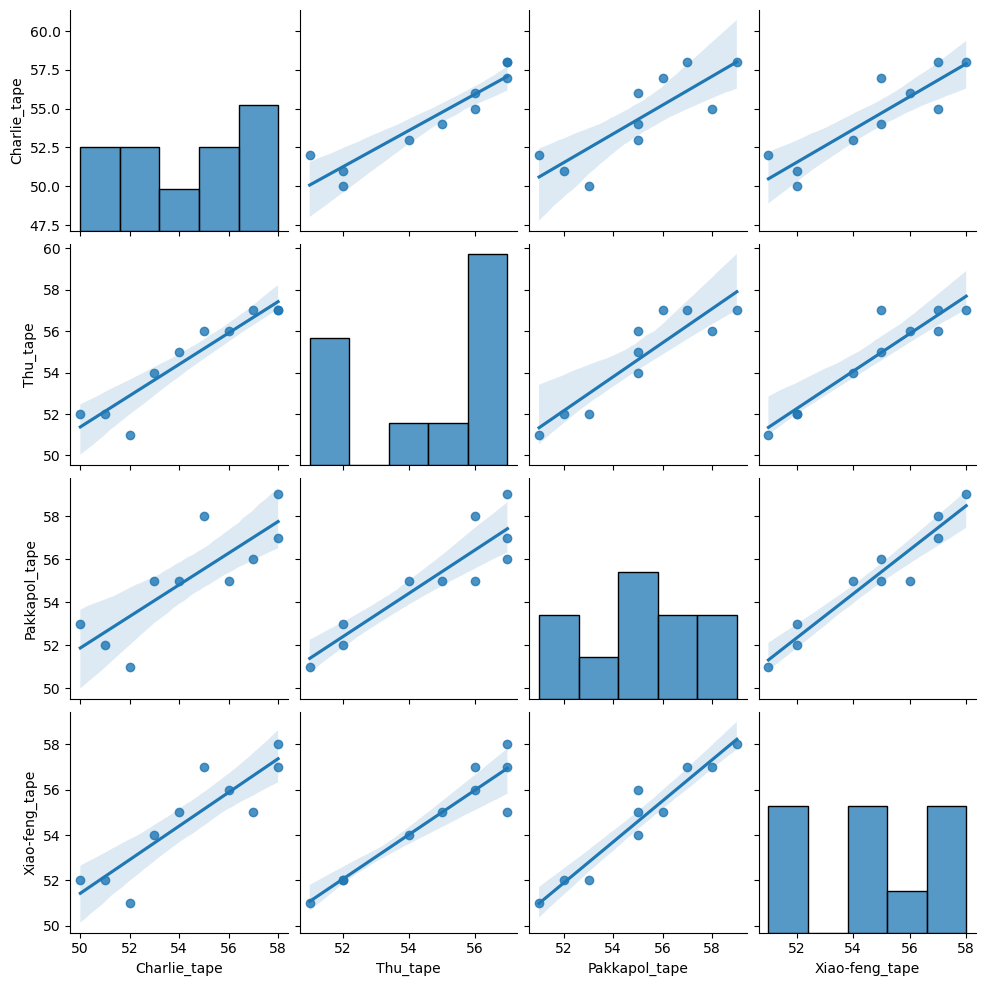

In [17]:
sns.pairplot(df, kind = 'reg');

The code above has produced regression plots for each pair of numerical variables. Have a look at the output. Are there big differences between the measurements made by each of the measurers?

To test for a link between head circumference and quiz score, we need to collect the measurements from the whole class. First, let's average the measurements and make a new column of this in the dataframe.

In [18]:
df['Av_diameter'] = df[['Charlie_tape','Thu_tape', 'Pakkapol_tape', 'Xiao-feng_tape']].mean(axis = 1)

<div class="alert alert-block alert-info">
<b>Tip:</b> The (axis = 1) statement in the code above tells Python in which direction to perform the operation. axis = 1 tells Python to perform the operation (in this case calculating the mean) by moving across the columns. axis = 0 tells Python to perform the operation by moving down the rows.
    
    | Column A | Column B |
    -----------------------
    | 0.626386 | 1.523251 |---- axis = 1 ----->
    ----------------------- 
         |         
         | axis = 0  
         ↓         
</div>

In [19]:
df.head()

,Group_member,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape,Av_diameter
0,Aaron,56,56,55,56,55.75
1,Alice,58,57,59,58,58.00
2,Charlie,51,52,52,52,51.75
3,Thibauld,55,56,58,57,56.50
4,Thu,52,51,51,51,51.25


The averages will be gathered by demonstrators, along with the quiz marks.  These will be kept anonymous!

Whilst you are waiting for all the class data to be gathered, have a look at the different plots you can do with seaborn (https://seaborn.pydata.org/examples/). You'll have more practice making different types of plots in week 3.

## Is there a correlation between head circumference and quiz score?

The demonstrators will enter all the data into a sharepoint document which can be read in using this code (once it is complete!). Don't worry about what this code means.

The columns are Student_Group, Student_Number, Head_Size_cm and Quiz_Score.

In [ ]:
import requests
 
file_url = 'https://uoe-my.sharepoint.com/:x:/g/personal/ckidner_ed_ac_uk/EWOdw-R6PTFOhgM8RkdP1dkB61N7-Z-gaOuRXFdPSK9fpw?download=1'
image_name = 'DexB2_class_data.xlsx'
r = requests.get(file_url, stream=True)
with open(image_name, 'wb') as f:
    for chunk in r.iter_content():
        f.write(chunk)

In [21]:
df_all = pd.read_excel('DexB2_class_data.xlsx') # loads the dataframe into Python

In [22]:
df_all.head()

,Student_Group,Student_Number,Head_Size_cm,Quiz_Score
0,gr1,1,56,7
1,gr1,2,54,3
2,gr1,3,57,6
3,gr1,4,52,2
4,gr1,5,51,9


Before we launch in to look for a correlation between head circumference (Head_Size_cm) and quiz score (Quiz_Score), let's first check our variables are normally distributed. This is important because some of the statistical tests we might want to use on our data make this assumption, so it is important to check!

Let's start with head circumference. First, we'll plot a histogram to see what the distribution of Head_Size_cm looks like.

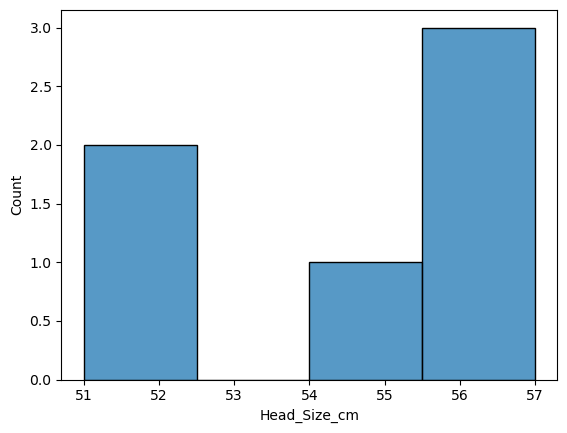

In [23]:
sns.histplot(data = df_all, x = 'Head_Size_cm');

Have a look at the graph above. Do the data look normally distributed?

Now let's test this formally with a statistical test called the Shapiro-Wilk test. Type the null hypothesis of this test in the cell below (you may need to look this up).

> The sample is normally distributed.

The following code performs the Shapiro-Wilk test (`shapiro`) on one set of measurements. Have a look through it and make sure you understand what the code is doing. Ask a demonstrator if anything is unclear.

In [24]:
stat, p = shapiro(df_all['Head_Size_cm'])
print(f'Statistics = {stat:.3f}, p = {p:.3f}')

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject null hypothesis)')
else:
	print('Sample does not look Gaussian (reject null hypothesis)')

Statistics = 0.883, p = 0.282
Sample looks Gaussian (fail to reject null hypothesis)


Now have a go plotting a histogram of the quiz scores. Then, use the shapiro test to formally check for normality.

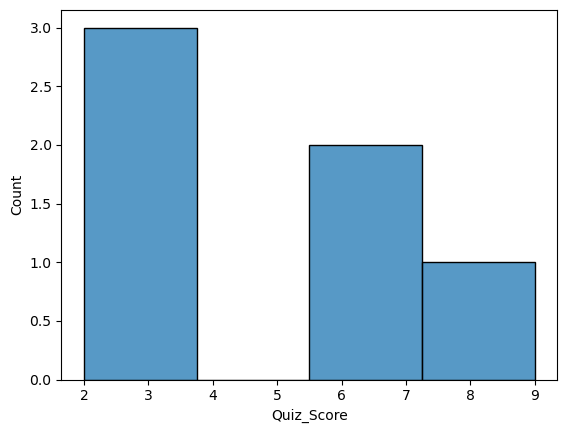

In [25]:
sns.histplot(data = df_all, x = 'Quiz_Score');

In [26]:
stat, p = shapiro(df_all['Quiz_Score'])
print(f'Statistics = {stat:.3f}, p = {p:.3f}')

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject null hypothesis)')
else:
	print('Sample does not look Gaussian (reject null hypothesis)')

Statistics = 0.889, p = 0.310
Sample looks Gaussian (fail to reject null hypothesis)


We are now ready to see if there is a correlation between head size and the ability to recall data analysis skills from last year.

Plot one against the other using `sns.regplot(data = df_all, x = 'Head_Size_cm', y = 'Quiz_Score');`. What does the graph suggest?

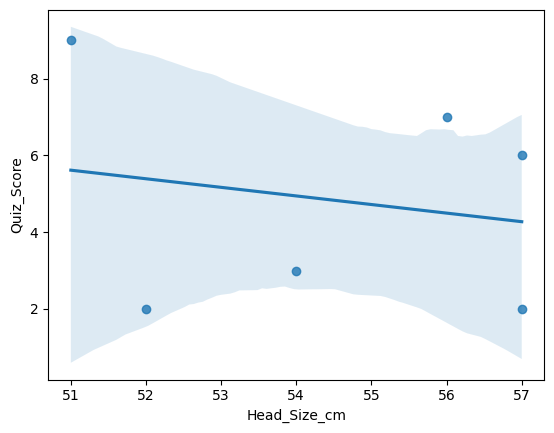

In [27]:
sns.regplot(data = df_all, x = 'Head_Size_cm', y = 'Quiz_Score');